In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import math;

#Used to read Directory Placeholders
#Operating System Interactions
import os;

#t-SNE
from sklearn.manifold import TSNE
from sklearn import preprocessing

#Pattern Recognition, glob for global. 
#File Operations
from glob import glob

#Image Processing
import cv2

#Keras
from keras.utils import np_utils

C:\Users\Gaurav Joshi\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


4750


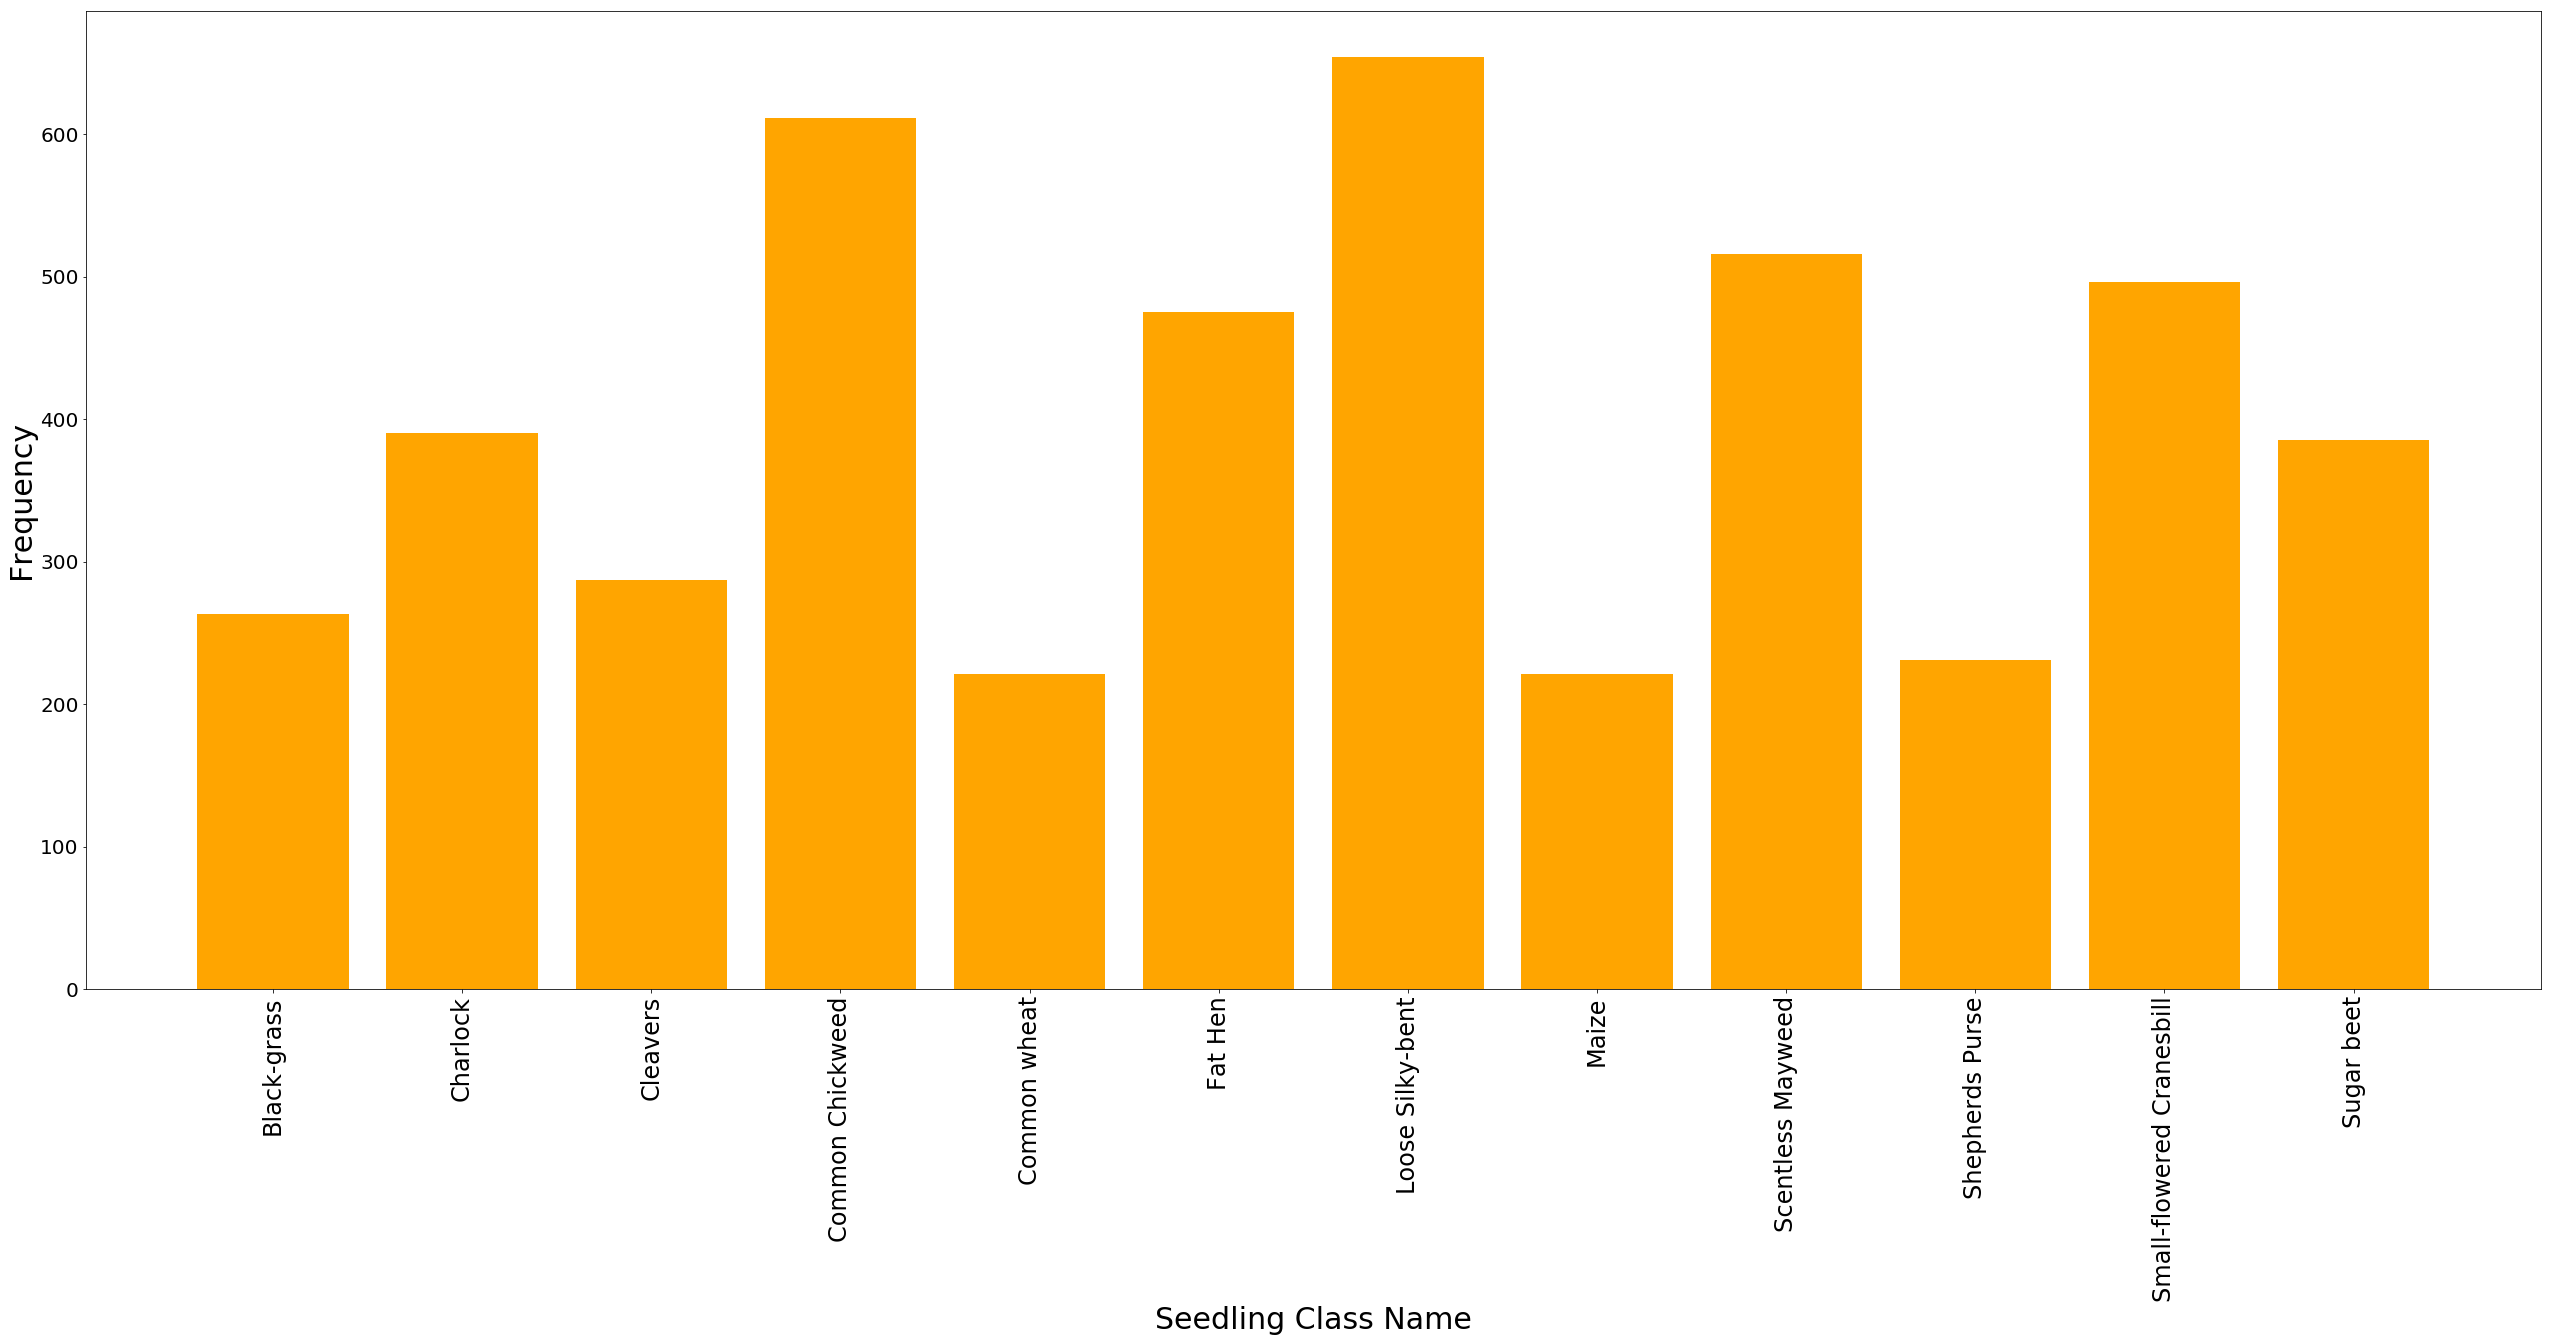

In [4]:
#Data Exploration
#Calculating the frequencies of various labels

dirs = os.listdir('../train');
label_freq = [];
sum = 0;

for name in dirs:
    path = '../train/' + name;
    sum += len(os.listdir(path))
    label_freq.append(len(os.listdir(path)));

print(sum)
#Visualization between Label and Frequency
plt.bar(dirs, label_freq, label='Seedling Class Frequencies', color='orange');
plt.xlabel('Seedling Class Name', fontsize=30);
plt.ylabel('Frequency', fontsize=30);
plt.rcParams['figure.figsize'] = (44,18);
plt.xticks(fontsize=24, rotation=90);
plt.yticks(fontsize=20);
plt.show();


In [5]:
#Visualizations using t-SNE
#t-Distributed Stochastic Neighboring Embeddings.
#Similar to PCA but much better, maintains small pairwise distances unlike PCA whose utility function is to maximize variance.
#It's basically a dimensionality reduction technique.



In [5]:
#Venturing with Image Processing
#Channels in an image is basically the dimensions of color it has, eg. Usually images have 3 channels RGB.

test_img_dir = os.listdir('../train/Charlock');
test_img = cv2.imread('../train/Charlock/0a7e1ca41.png');
height, width, channels = test_img.shape;

resized_img = cv2.resize(test_img, (7,7));

print(resized_img.shape);
print(test_img.shape);
print(test_img.size);

(7, 7, 3)
(484, 484, 3)
702768


In [6]:
#Every Image now corresponds to 7 Matrices of size 7*3, 3 being channels RGB.
#Resizing each image to a scale of 7*7

path_to_images = '../train/*/*.png';
images = glob(path_to_images);
train_set = []
train_labels = []
num = len(images)

for i in images:
    train_set.append(cv2.resize(cv2.imread(i), (7,7)))
    train_labels.append(i.split('/train\\')[-1].split('\\')[-2])
    
train_set = np.asarray(train_set)
train_labels = pd.DataFrame(train_labels)
    

In [66]:
#Cleaning the image and Removing the background
#Let's keep it for later(if needed).

#Converting RGB Model to HSV Model 
#H: Hue, color.
#S: Saturation, amt to which respective color is mixed with white.
#V: Value, amt to which respective color is mixed with black.


In [15]:
#Converting String classes into Numeric label arrays
#[0] is used to convert a column vector in a 1D Array
#np.utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.

labels = preprocessing.LabelEncoder()
labels.fit(train_labels[0])
print('Label Classes: '+ str(labels.classes_))

encoded_labels = labels.transform(train_labels[0])
print(encoded_labels)

cat_labels = np_utils.to_categorical(encoded_labels)
print(cat_labels.shape)

train_labels[0].value_counts().plot(kind='pie', )
plt.show()

SyntaxError: invalid syntax (<ipython-input-15-a77acb1182c8>, line 15)

In [62]:
#Splitting the entire dataset in Train, Test and Validation.



(4750, 1)
